In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
scaling = pd.read_csv('yambo_benchmarks.csv')

In [3]:
scaling

ncores  MPI  threads       dip        Xo       X    Sgm_x     Sgm_c  \
0     160   20        8  576.6038  957.0000  4.7830  14.8450  166.9794   
1     320   40        8  299.9611  556.4200  9.3613   8.1982   81.2920   
2     480   60        8  207.5871  393.9697  9.6609   5.7833   79.7920   
3     640   80        8  160.9895  306.3268  2.5007   4.3620   41.8019   
4     800  100        8  137.3013  239.2997  9.1440   3.7741   33.9519   
5     960  120        8  118.8140  220.5923  8.6329   3.3925   28.1600   
6    1120  140        8  106.3719  185.3537  3.3246   3.2977   24.2758   
7    1280  160        8   93.7193  160.5194  3.1809   3.0285   21.5891   
8    1600  200        8   85.7031  139.7730  3.0831   2.6406   17.5087   

   WALL_TIME  
0       1751  
1        986  
2        736  
3        551  
4        469  
5        427  
6        385  
7        337  
8        314

In [4]:
scaling['nodes'] = scaling['MPI'] // 4

In [5]:
scaling['ideal'] = scaling['nodes'] / scaling['nodes'].min()

In [6]:
scaling['speedup'] = scaling.WALL_TIME.max() / scaling.WALL_TIME

In [7]:
scaling['efficiency'] = scaling.speedup / scaling.ideal * 100

In [8]:
scaling['sigma'] = scaling['Sgm_c'] + scaling['Sgm_x']

In [9]:
scaling['other'] = scaling['WALL_TIME'] - scaling['dip'] - scaling['Xo'] - scaling['X'] - scaling['sigma']

In [20]:
scaling

ncores  MPI  threads       dip        Xo       X    Sgm_x     Sgm_c  \
0     160   20        8  576.6038  957.0000  4.7830  14.8450  166.9794   
1     320   40        8  299.9611  556.4200  9.3613   8.1982   81.2920   
2     480   60        8  207.5871  393.9697  9.6609   5.7833   79.7920   
3     640   80        8  160.9895  306.3268  2.5007   4.3620   41.8019   
4     800  100        8  137.3013  239.2997  9.1440   3.7741   33.9519   
5     960  120        8  118.8140  220.5923  8.6329   3.3925   28.1600   
6    1120  140        8  106.3719  185.3537  3.3246   3.2977   24.2758   
7    1280  160        8   93.7193  160.5194  3.1809   3.0285   21.5891   
8    1600  200        8   85.7031  139.7730  3.0831   2.6406   17.5087   

   WALL_TIME  nodes  ideal   speedup  efficiency     sigma    other  
0       1751      5    1.0  1.000000  100.000000  181.8244  30.7888  
1        986     10    2.0  1.775862   88.793103   89.4902  30.7674  
2        736     15    3.0  2.379076   79.302536   85.5753  39.2070  
3        551     20    4.0  3.177858   79.446461   46.1639  35.0191  
4        469     25    5.0  3.733475   74.669510   37.7260  45.5290  
5        427     30    6.0  4.100703   68.345043   31.5525  47.4083  
6        385     35    7.0  4.548052   64.972171   27.5735  62.3763  
7        337     40    8.0  5.195846   64.948071   24.6176  54.9628  
8        314     50   10.0  5.576433   55.764331   20.1493  65.2915

In [10]:
color1='#112F41'
color2='#2EA6A6'
color3='#47AB6C'
color4='#F28F38'
color5='#D90718'

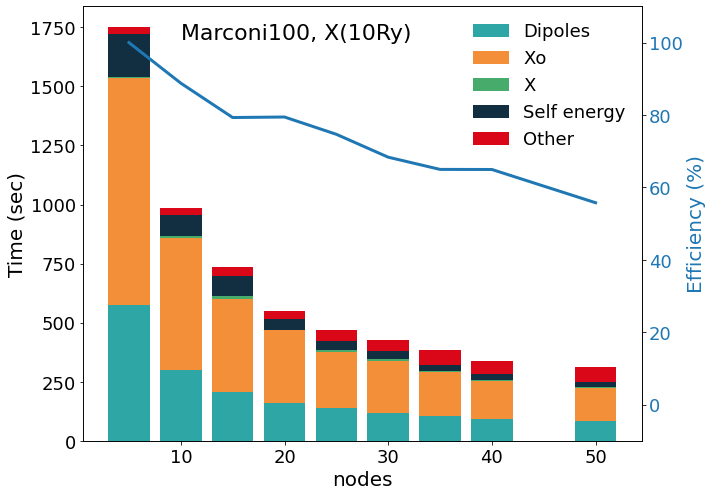

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.bar(scaling['nodes'], scaling['dip']   ,width=4,color=color2,label='Dipoles')
ax1.bar(scaling['nodes'], scaling['Xo']    ,width=4,color=color4,label='Xo',bottom=scaling['dip'])
ax1.bar(scaling['nodes'], scaling['X']     ,width=4,color=color3,label='X',bottom=scaling['dip']+scaling['Xo'] )
ax1.bar(scaling['nodes'], scaling['sigma'] ,width=4,color=color1,label='Self energy',bottom=scaling['dip']+scaling['Xo']+scaling['X'])
ax1.bar(scaling['nodes'], scaling['other'] ,width=4,color=color5,label='Other',bottom=scaling['dip']+scaling['Xo']+scaling['X']+scaling['sigma'])

ax1.set_xlabel('nodes',fontsize=20)
ax1.set_ylabel('Time (sec)',fontsize=20)
ax1.legend()
ax1.legend(fontsize='18',framealpha=0.0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax1.text(10, 1700, r'Marconi100, X(10Ry)', fontsize=22)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([-10, 110])
ax2.set_ylabel('Efficiency (%)', color='tab:blue',fontsize=20)  # we already handled the x-label with ax1
ax2.plot(scaling['nodes'], scaling['efficiency'], linewidth=3, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=18)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('scaling.png')
#plt.show()